In [1]:
from Bio import SeqIO
import re
from collections import defaultdict
import pandas as pd
from collections import Counter
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Snehal

## Creating a dictionary of the Individual and the Population to which it belongs

Popmap.txt has mapping of individuals to their population
popII P2_1
Creating a dictionary of it to add to the dataframes later

In [3]:
pop_dict = defaultdict(list)
pop_file = pd.read_csv("Popmap.txt",sep='\t',header=None)
pop_dict = dict(zip(list(pop_file[0]), list(pop_file[1])))


## Creating List of Population, Individual, Locii and the Sequence


#### The input file has following format:
>CLocus_5_Sample_1_Locus_5_Allele_0 [P2_1]
TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC

#### Retrieving the Loci from ID    e.g From above the Locii is 5
#### Individual name from description  e.g P2_1
#### Sequence from fasta.seq

#### Retrieving the Locii  5 from 'CLocus_5_Sample_1_Locus_5_Allele_0' splitting by '_'
#### Retrieving the Individual from the description and retrieving the name from [] using regular expression

In [4]:

col_locii = []
pop_uniq_seq = defaultdict(list)
loci_seq_df = []
fasta_sequences = SeqIO.parse(open('populations.samples.fa'),'fasta')
with open('populations.samples.fa') as out_file:
    for fasta in fasta_sequences:
        name, sequence,description = fasta.id, str(fasta.seq), str(fasta.description)
        locii = name.split('_')[1]
        descr = description.split(" ")[1]
        descr=re.sub('[\[\]]', '', descr)
        population = pop_dict[descr]
        pop_uniq_seq[population].append(sequence.strip())
        loci_seq_df.append([population,descr,locii,sequence] )  

## Calculation the number of unique sequences for each Population


#### pop_uniq_seq retrieved from above has all the list of sequences that belong to a population

In [5]:
pop_uniq_seq['popII']

['TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC',
 'TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC',
 'TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC',
 'TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC',
 'TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC',
 'TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC',
 'TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC',
 'TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAA

#### Counting the repeating sequence for each population and then summing all the unique sequences

In [6]:
bb=defaultdict(list)
pop_seq_cnt = dict()
for key,values in pop_uniq_seq.items():
    bb[key]=dict(zip(list(values),[list(values).count(i) for i in list(values)]))
    pop_seq_cnt[key]= len(bb[key].values())

## Abdul:
#### Creating a DataFrame to generate graphs

In [21]:
pop_seq_df = pd.DataFrame([pop_seq_cnt])
print(pop_seq_df)

   popII  popIII  popIV  popV  popVI
0   1012    1140   1169  1173    889


#### Plot of the total number of sequences that occur only in each population

In [25]:
axx = pop_seq_df.T
#axx= ax1.rename(columns={'0': 'a'}, index={'': 'one'})

In [26]:
axx

,0
popII,1012
popIII,1140
popIV,1169
popV,1173
popVI,889


Text(0.5, 0, 'Population')

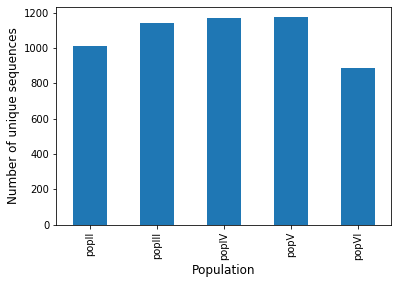

In [27]:
axa =axx.plot(kind='bar', legend = None)
axa.set_ylabel("Number of unique sequences", fontsize=12)
axa.set_xlabel("Population", fontsize=12)

#### Creating DataFrame

In [28]:
df = pd.DataFrame(loci_seq_df)
df.columns = ['population', 'individual', 'locii', 'sequence']
df

,population,individual,locii,sequence
0,popII,P2_1,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...
1,popII,P2_1,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...
2,popII,P2_3,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...
3,popII,P2_3,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...
4,popII,P2_4,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...
...,...,...,...,...
89635,popV,P5_17,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...
89636,popV,P5_18,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...
89637,popV,P5_18,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...
89638,popV,P5_25,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...


#### Getting Number of Unique sequences for the entire dataset

In [29]:
seq_cont = df['sequence'].value_counts()
seq_cont = pd.DataFrame(seq_cont)
seq_cont

,sequence
TGCAGGCAATTCGTCTGTGTCACTTACGTAATTTCTTATCAGGAGCAACACAATAGATTGATATCAGATTGACATAAATCAATTATTGAGAGGAGAGTCTGCCGCCTGGATCAGCTAAAACCCGAC,106
TGCAGGCTAAAGGACCTGTTTTTCCTAAAGCTGCCCTGTAGCCTAGAGGACTTGGTTCTCCTACTGCCTAGAAAATCTGTCTCTTCCGAATATGCTCTGTAGCTTAGAGGACCTCTTTCTCCTGAA,106
TGCAGGAAAGTACCCTGTCCAATACTAGGATTCAAAACTCTTTTACAATTAAGAAGACTCATAAAATTCAATATCTACTGAATATAGAGAATTAATATCCAATGATTCTATCAACAAAAAACCAAA,106
TGCAGGTGGTCTAGATACACCCAAACATCAGTAGCCCCAGACACCGAAGCTAAAGGCCAGGCACAGTTACTGGTATTCATGGTTAAACCATGGGGAGGCGATCCTGGAACCACAGGCACGTGGTCG,106
TGCAGGGGGAACACCTCGGAGGAGGTCACTGAAGCCCTTAGAGGACCTCAGGCTGAAATCTTCAGGGACAAATGGAGTTAGCAGGCTGTTGAGTCACTTGGCCAACTTATATGGGGGGGGGGACC,106
...,...
TGCAGGCTTTTTTTTGCCCACCATCAAACTTCCTGATGAAGTTATTATGCNGCCTTTGCCACCACCATCACCCACAGTGCCTGCCTCAGTGGCACTGGCACTGGTACAGTCTCAGCCAACTTCAACA,2
TGCAGGAGCTCCAACTTGATGTGTCAAAAAAGATAGCTTCCACCTCCAATGCATCACAGGTGAGTTCCGTCAAGGCTATGCCTATGGNAATGTGAAAACATATAAGCCAGGTAATCCACTATGACC,2
TGCAGGGGGTCAGNAACAAGTGGGGAATTCTTCATAAGGAGGTTACAGATACGTCANGATTGATAATAAATGATGAGGTCGAGTTTCTGAGTAGTGTCAGTAGGTTTGACACCTCTTTCCACAATC,2
TGCAGGCTGGCCTCGCAGCTGCTACGGTTCATGGACGTGGGGTGCTCCCAGCTGGCTTTCGNTCCTGGAAACGCTCAATGGCTTGCTGATTGCGGCTCTGTGGATGGTTGGCTTCTGAAGCCATTC,2


## Snehal

## Calculating if both allels in the Population, Individual and Loci are same or different

>CLocus_5_Sample_1_Locus_5_Allele_0 [P2_1]
TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC
>CLocus_5_Sample_1_Locus_5_Allele_1 [P2_1]
TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGCTTGATGATAAGCAACAGAGGGGTATAGAGGTACAAGATAATTCCCCAGCAAAATTCTACTTAACTTTATGATTGAATTCC

For each Individual we have 2 sequences 
CLocus_5_Sample_1_Locus_5_Allele_0
CLocus_5_Sample_1_Locus_5_Allele_1

To Check if these are same or different we create 2 dataframes with sequence_0 and sequence_1 and combine the dataframe to have both in 1 row

#### For each Locii and Individual there are 2 sequences 0 and 1 marking them as 1 and 2

In [30]:
df['seq'] = df.groupby(['population', 'individual', 'locii']).cumcount()+1;
df

,population,individual,locii,sequence,seq
0,popII,P2_1,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...,1
1,popII,P2_1,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...,2
2,popII,P2_3,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...,1
3,popII,P2_3,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...,2
4,popII,P2_4,5,TGCAGGTAATATAATGGACAAATTAAGATTTCCTAAGTATTGCTGC...,1
...,...,...,...,...,...
89635,popV,P5_17,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,2
89636,popV,P5_18,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,1
89637,popV,P5_18,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,2
89638,popV,P5_25,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,1


#### Combining the two rows for the same Population, Individual and Locii into one 

In [31]:
df1 = df[df.seq == 1]
df1.columns = ['population', 'individual', 'locii', 'sequence_0', 'seq']
df2 = df[df.seq == 2]
df2.columns = ['population', 'individual', 'locii', 'sequence_1', 'seq']


In [32]:
df1 = df1.drop('seq',axis=1)
df2 = df2.drop('seq',axis=1)


#### Merging both the sequences into one row

In [33]:
result = pd.merge(df1, df2, on=['population','individual','locii'])

In [34]:
result.tail()

,population,individual,locii,sequence_0,sequence_1
44815,popV,P5_15,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...
44816,popV,P5_16,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...
44817,popV,P5_17,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...
44818,popV,P5_18,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...
44819,popV,P5_25,163722,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...,TGCAGGTGGTCTAGAGACTCCAACACACATCCGTCCCACCAGACAC...


#### Now we have Dataframe with both the sequence in one row

In [35]:
df = pd.DataFrame(result)

#### Checking for any NULL values

In [36]:
df[pd.isnull(df['sequence_1'])]

,population,individual,locii,sequence_0,sequence_1


## Checking for Homozygotes or Heterozygotes

#### If sequence is a homozygote it will be coded as 0404 and for heterozygote 0102

In [37]:
sim_chk = []
for index,i in df.iterrows():
    if(i['sequence_0'] == (i['sequence_1'])):
        sim_chk.append('0404')
    else:
        sim_chk.append('0102')
        


#### Adding the coded values in the dataframe

In [38]:
df['seq'] = sim_chk

In [39]:
df['seq'].unique()

array(['0404', '0102'], dtype=object)

####  Cleaning the DataFrame

##### We do not need the sequences so removing those columns

In [40]:
df = df.drop('sequence_0',axis=1)
df = df.drop('sequence_1',axis=1)

In [41]:
df.tail()

,population,individual,locii,seq
44815,popV,P5_15,163722,0404
44816,popV,P5_16,163722,0404
44817,popV,P5_17,163722,0404
44818,popV,P5_18,163722,0404
44819,popV,P5_25,163722,0404


## Abdul

####  Pivoting the DataFrame
####  Columns will be the Locii and the sequence will be the value

In [42]:
df_pivot = pd.pivot_table(df, values = 'seq', index=['population','individual'], columns = 'locii',aggfunc='first')

#### Missing values are coded as 0000

In [43]:
df_final = df_pivot.fillna('0000')

Now a fasta file have been converted to a commonly used file format in population genetic analysis(e.g. https://genepop.curtin.edu.au/help_input.html#Input).

In [44]:
for index,locii in df_final.iterrows():
    print(locii)

locii
10031    0000
10049    0404
10065    0404
10110    0404
10113    0404
         ... 
9845     0404
9851     0404
9871     0404
9873     0404
99       0404
Name: (popII, P2_1), Length: 1031, dtype: object
locii
10031    0000
10049    0102
10065    0404
10110    0404
10113    0404
         ... 
9845     0404
9851     0404
9871     0404
9873     0404
99       0404
Name: (popII, P2_15), Length: 1031, dtype: object
locii
10031    0000
10049    0404
10065    0404
10110    0404
10113    0404
         ... 
9845     0404
9851     0404
9871     0404
9873     0000
99       0000
Name: (popII, P2_16), Length: 1031, dtype: object
locii
10031    0000
10049    0404
10065    0404
10110    0404
10113    0404
         ... 
9845     0404
9851     0404
9871     0404
9873     0404
99       0404
Name: (popII, P2_17), Length: 1031, dtype: object
locii
10031    0000
10049    0404
10065    0404
10110    0404
10113    0404
         ... 
9845     0404
9851     0404
9871     0404
9873     0404
99       0404
N

## Snehal

## Finding average of Mismatches (heterozygotes), Matching(homozygotes) or Missing values for each Locus

#### Creating dictionary for each Locus and its set of matches, mismatches and missing values

In [45]:
num_indi_locii = defaultdict(dict)  
locii_vals = defaultdict(list)    
for index,locii in df_final.iterrows():
        for lname,lvalue in locii.iteritems():
            locii_vals[lname].append(lvalue)
            num_indi_locii[index[0]] = locii_vals


## Number of Individual in each Locus (Average)

## Also Calculating the Inbreeding

Counting all the Matches and Mismatches and leaving out the missing counts(0000)
Also calculating for the Inbreeding (1 - mismatch/Total )

In [46]:
count_indi = dict()
counts = defaultdict(list)
inbreeding = dict()
inbreed = dict()
c = dict()
for  key,values in num_indi_locii.items():
     for index,val in values.items():
        counts[index] = dict(zip(list(val),[list(val).count(i) for i in list(val)]))
        c[index] = (sum(j for i,j in counts[index].items() if i!='0000')/sum(j for i,j in counts[index].items()))
        count_indi[key] = c
        inbreed[index] = 1- ( sum(j for i,j in counts[index].items() if i == '0102')/sum(j for i,j in counts[index].items()))
        inbreeding[key] = inbreed


In [47]:
locii_ind_pop = pd.DataFrame(count_indi)
print(locii_ind_pop)

          popII    popIII     popIV      popV     popVI
10031  0.716981  0.716981  0.716981  0.716981  0.716981
10049  0.735849  0.735849  0.735849  0.735849  0.735849
10065  0.962264  0.962264  0.962264  0.962264  0.962264
10110  0.924528  0.924528  0.924528  0.924528  0.924528
10113  0.943396  0.943396  0.943396  0.943396  0.943396
...         ...       ...       ...       ...       ...
9845   0.962264  0.962264  0.962264  0.962264  0.962264
9851   0.962264  0.962264  0.962264  0.962264  0.962264
9871   0.924528  0.924528  0.924528  0.924528  0.924528
9873   0.773585  0.773585  0.773585  0.773585  0.773585
99     0.943396  0.943396  0.943396  0.943396  0.943396

[1031 rows x 5 columns]


## Abdul

Inspecting the data of a subset of populatons to see if the number of individuals per loci has the same distribution among populations

In [48]:
popII_hist = locii_ind_pop[['popII']]
popIII_hist = locii_ind_pop[['popIII']]
popIV_hist = locii_ind_pop[['popIV']]
poppopV_hist = locii_ind_pop[['popV']]
poppopVI_hist = locii_ind_pop[['popVI']]

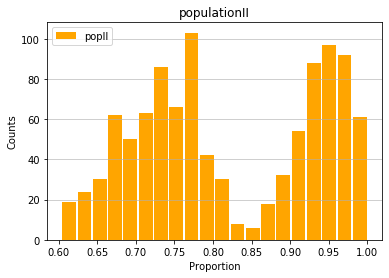

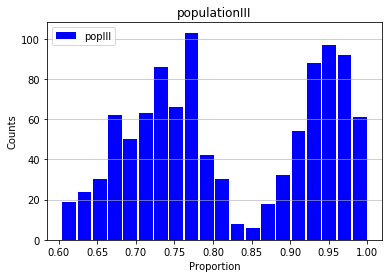

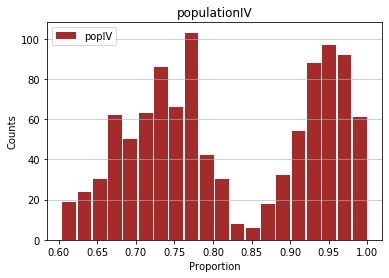

In [49]:
popII_hist.plot.hist(grid=None, bins=20, rwidth=0.9,
                   color='orange')
plt.title('populationII')

plt.xlabel('Proportion')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
##########################################################
popIII_hist.plot.hist(grid=None, bins=20, rwidth=0.9,
                   color='blue')

plt.title('populationIII')

plt.xlabel('Proportion')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

#####################################################333
popIV_hist.plot.hist(grid=None, bins=20, rwidth=0.9,
                   color='brown')
plt.title('populationIV')

plt.xlabel('Proportion')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

## Snehal

####  Columns which have no Missing/Matching/Mismatch count marking it to 0

In [64]:
final_cnt = pd.DataFrame(counts)
final_cnt = final_cnt.fillna(0)
final_cnt_T = final_cnt.T

In [65]:

final_cnt_T

,0000,0404,0102
10031,15.0,32.0,6.0
10049,14.0,30.0,9.0
10065,2.0,51.0,0.0
10110,4.0,49.0,0.0
10113,3.0,46.0,4.0
...,...,...,...
9845,2.0,48.0,3.0
9851,2.0,51.0,0.0
9871,4.0,49.0,0.0
9873,12.0,41.0,0.0


## Abdul

Transposing the data to plot a the effective number of usable data(homozygote or heterozygote) and inspecting missing.

In [66]:
#final_cnt_T.row = ['Missing', 'Matching', 'Mismatch']
final_Transpose = final_cnt_T.T
df_new = final_Transpose.rename(index={'0000': 'Missing_data', '0404': 'Homozygotes','0102': 'Heterozygotes' })
df_new

,10031,10049,10065,10110,10113,10120,1013,101609,10172,10187,...,9707,9709,9755,9816,982,9845,9851,9871,9873,99
Missing_data,15.0,14.0,2.0,4.0,3.0,12.0,0.0,19.0,5.0,12.0,...,13.0,14.0,3.0,16.0,14.0,2.0,2.0,4.0,12.0,3.0
Homozygotes,32.0,30.0,51.0,49.0,46.0,41.0,53.0,34.0,45.0,41.0,...,40.0,39.0,46.0,37.0,39.0,48.0,51.0,49.0,41.0,50.0
Heterozygotes,6.0,9.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


Selecting some loci to see the distribution of each data category (homozygote, heterozygote and missing data)

In [67]:
df_hist = df_new[['10049', '10065', '10110', '10113', '10120', '1013', '101609', '10172']]
    

df_hist

,10049,10065,10110,10113,10120,1013,101609,10172
Missing_data,14.0,2.0,4.0,3.0,12.0,0.0,19.0,5.0
Homozygotes,30.0,51.0,49.0,46.0,41.0,53.0,34.0,45.0
Heterozygotes,9.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0


In [68]:
df_histo= df_hist.T


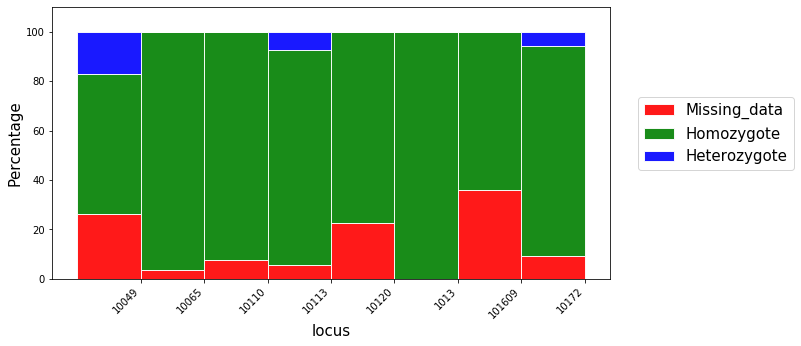

In [69]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1
#
# positions of the left bar-boundaries
bar_l = [i for i in range(len(df_histo['Missing_data']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each locus
totals = [i+j+k for i,j,k in zip(df_histo['Missing_data'], df_histo['Homozygotes'], df_histo['Heterozygotes'])]

# Create the percentage of the total score of the Missing value for each locus was
pre_rel = [i / j * 100 for  i,j in zip(df_histo['Missing_data'], totals)]

# Create the percentage of the total score of the Homozygotes value for each locus was
mid_rel = [i / j * 100 for  i,j in zip(df_histo['Homozygotes'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(df_histo['Heterozygotes'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Missing_data', 
       # with alpha
       alpha=0.9, 
       # with color
       color='r',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Homozygote', 
       # with alpha
       alpha=0.9, 
       # with color
       color='g', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       post_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
       # labeled 
       label='Heterozygote',
       # with alpha
       alpha=0.9, 
       # with color
       color='b', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df_histo.index)
ax.set_ylabel("Percentage", fontsize=15)
ax.set_xlabel("locus", fontsize=15)

# Let the borders of the graphic

plt.ylim(0, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(fontsize=15, loc=(1.05, 0.4))
# shot plot
plt.show()

## Snehal

####  Creating the Average Missing, Matching and Mismatch for each Locus

In [70]:
final_cnt_T.columns = ['Missing', 'Matching', 'Mismatch']
final_avg = final_cnt_T.div(final_cnt_T.sum(axis=1), axis=0)
final_avg

,Missing,Matching,Mismatch
10031,0.283019,0.603774,0.113208
10049,0.264151,0.566038,0.169811
10065,0.037736,0.962264,0.000000
10110,0.075472,0.924528,0.000000
10113,0.056604,0.867925,0.075472
...,...,...,...
9845,0.037736,0.905660,0.056604
9851,0.037736,0.962264,0.000000
9871,0.075472,0.924528,0.000000
9873,0.226415,0.773585,0.000000


## Abdul

## Inbreeding coefficient for each population
    

In [72]:
inbreedind_df = pd.DataFrame(inbreeding)
print(inbreedind_df)

          popII    popIII     popIV      popV     popVI
10031  0.886792  0.886792  0.886792  0.886792  0.886792
10049  0.830189  0.830189  0.830189  0.830189  0.830189
10065  1.000000  1.000000  1.000000  1.000000  1.000000
10110  1.000000  1.000000  1.000000  1.000000  1.000000
10113  0.924528  0.924528  0.924528  0.924528  0.924528
...         ...       ...       ...       ...       ...
9845   0.943396  0.943396  0.943396  0.943396  0.943396
9851   1.000000  1.000000  1.000000  1.000000  1.000000
9871   1.000000  1.000000  1.000000  1.000000  1.000000
9873   1.000000  1.000000  1.000000  1.000000  1.000000
99     1.000000  1.000000  1.000000  1.000000  1.000000

[1031 rows x 5 columns]


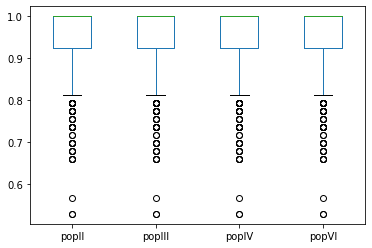

In [73]:
inbreedind_df.boxplot(column=['popII', 'popIII', 'popIV', 'popVI'], grid=False)

Data Transformation to see if the distribution will improve

In [74]:
Log_inbr = np.log10((inbreedind_df)+1)

In [75]:
Log_inbr

,popII,popIII,popIV,popV,popVI
10031,0.275724,0.275724,0.275724,0.275724,0.275724
10049,0.262496,0.262496,0.262496,0.262496,0.262496
10065,0.301030,0.301030,0.301030,0.301030,0.301030
10110,0.301030,0.301030,0.301030,0.301030,0.301030
10113,0.284324,0.284324,0.284324,0.284324,0.284324
...,...,...,...,...,...
9845,0.288561,0.288561,0.288561,0.288561,0.288561
9851,0.301030,0.301030,0.301030,0.301030,0.301030
9871,0.301030,0.301030,0.301030,0.301030,0.301030
9873,0.301030,0.301030,0.301030,0.301030,0.301030


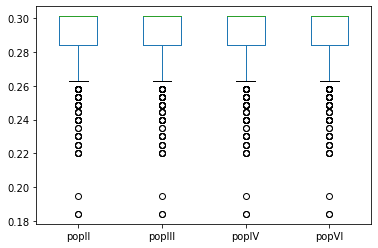

In [76]:
Log_inbr.boxplot(column=['popII', 'popIII', 'popIV', 'popVI'], grid=False)